In [69]:
# %load simulations
from TreeClassifier import *
from TreeHardClassifier import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import svm
import numpy as np
import datetime
import os

In [70]:
def generate_data(n,d, multiplier):
    X1 = np.random.normal(size=[n/2, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(X1).sum(axis=1)), (-1, 1))
    X1 = np.divide(X1, row_squared_sums)
    X2 = np.random.normal(size=[n/2, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(X2).sum(axis=1)), (-1, 1))
    X2 = np.divide(X2, multiplier*row_squared_sums)
    X = np.concatenate([X1,X2],axis=0)
    y = np.concatenate([np.ones(n/2),np.zeros(n/2)])
    return X,y

In [71]:
n = 100000
d = 50

def manage_run(multiplier):
    X,y = generate_data(n,d,multiplier)
    
    svm_scores = cross_val_score(LinearSVC(fit_intercept=True), X, y, cv=5)
    print "svm"
    print svm_scores
    print svm_scores.mean()
    
    stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=3, print_debug=False), X, y, cv=5)
    print "stochasic"
    print stochastic_scores
    print stochastic_scores.mean()
        
    tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X, y, cv=5)
    print "regular"
    print tree_scores
    print tree_scores.mean()
    
    return svm_scores, stochastic_scores, tree_scores

In [72]:
multipliers = [1 + 1/2.0**(i+1) for i in range(4)]
multipliers

[1.5, 1.25, 1.125, 1.0625]

In [73]:
multipliers += [2.0**i for i in range(8)]
multipliers.sort()
multipliers

[1.0, 1.0625, 1.125, 1.25, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]

In [74]:
svm_scores_means = {}
stochastic_scores_means = {}
tree_scores_means = {}

for m in multipliers:
    print m
    svm_scores_means[m], stochastic_scores_means[m], tree_scores_means[m] = manage_run(m)
    print ''

1.0
svm
[ 0.4983   0.5013   0.5002   0.4972   0.49885]
0.49917
stochasic
[ 0.49745  0.501    0.5001   0.49705  0.49905]
0.49893
regular
[ 0.4999   0.5022   0.5      0.4991   0.50155]
0.50055

1.0625
svm
[ 0.50245  0.49915  0.50045  0.5064   0.49355]
0.5004
stochasic
[ 0.8496   0.8259   0.83275  0.835    0.80905]
0.83046
regular
[ 0.51305  0.5123   0.51685  0.51405  0.50985]
0.51322

1.125
svm
[ 0.4975   0.50505  0.50085  0.4987   0.50295]
0.50101
stochasic
[ 0.99955  0.99985  0.9998   0.9996   0.99985]
0.99973
regular
[ 0.53005  0.5262   0.5306   0.52955  0.53395]
0.53007

1.25
svm
[ 0.50265  0.4977   0.4999   0.50145  0.50505]
0.50135
stochasic
[ 1.  1.  1.  1.  1.]
1.0
regular
[ 0.55835  0.55995  0.5577   0.56065  0.5577 ]
0.55887

1.5
svm
[ 0.50165  0.49745  0.49475  0.4956   0.4981 ]
0.49751
stochasic
[ 1.  1.  1.  1.  1.]
1.0
regular
[ 0.60735  0.609    0.6044   0.6032   0.61205]
0.6072

2.0
svm
[ 0.4988  0.5004  0.4944  0.5026  0.4926]
0.49776
stochasic
[ 1.  1.  1.  1.  1.]
1.0


In [75]:
%matplotlib inline

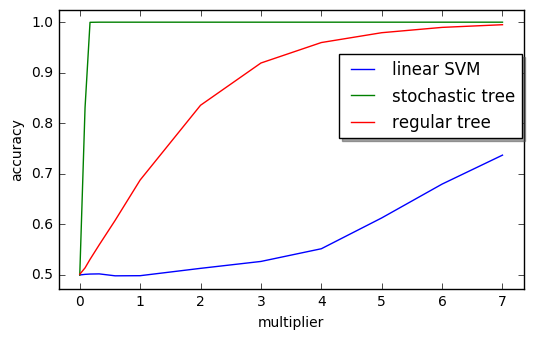

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(np.log2(multipliers),[svm_scores_means[m].mean() for m in multipliers], label = 'linear SVM')
ax.plot(np.log2(multipliers),[stochastic_scores_means[m].mean() for m in multipliers], label = 'stochastic tree')
ax.plot(np.log2(multipliers),[tree_scores_means[m].mean() for m in multipliers], label = 'regular tree')

ax.margins(0.05) # 5% padding in all directions
# legend = ax.legend(lbbox_to_anchor=(1.1, 1.05), shadow=True)

ax.set_xlabel('multiplier')
ax.set_ylabel('accuracy')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.87),
          fancybox=False, shadow=True, ncol=1)

plt.show()
fig.savefig(r'c:\temp\circle-simulation.pdf')

In [77]:
# tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X, y, cv=5)
# print "regular"
# print tree_scores.mean()

In [78]:
# gaus_scores = cross_val_score(svm.SVC(kernel='rbf', gamma=2), X, y, cv=5)
# print "gauss"
# print gaus_scores.mean()